In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [7]:
df.isnull().mean()*100

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [8]:
df.shape

(19158, 13)

In [13]:
# cols = []
# for var in df.columns:
#     if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0:
#         print(var)
#         cols.append(var)
# print(cols)

city_development_index
enrolled_university
education_level
experience
training_hours
['city_development_index', 'enrolled_university', 'education_level', 'experience', 'training_hours']


In [14]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05
        and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [17]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1042,0.920,no_enrollment,Graduate,4.0,127.0
6686,0.624,Part time course,Graduate,8.0,58.0
1433,0.682,no_enrollment,Graduate,4.0,34.0
16855,0.689,Full time course,Graduate,2.0,39.0
14125,0.920,no_enrollment,Masters,14.0,166.0


In [19]:
df['education_level'].value_counts().sort_values()

Primary School      308
Phd                 414
High School        2017
Masters            4361
Graduate          11598
Name: education_level, dtype: int64

In [39]:
print(f'Total number of missing rows in percentage:\
 {round((1 - len(df[cols].dropna())/len(df)) * 100,2)} %')

Total number of missing rows in percentage: 10.31 %


In [40]:
new_df = df[cols].dropna()

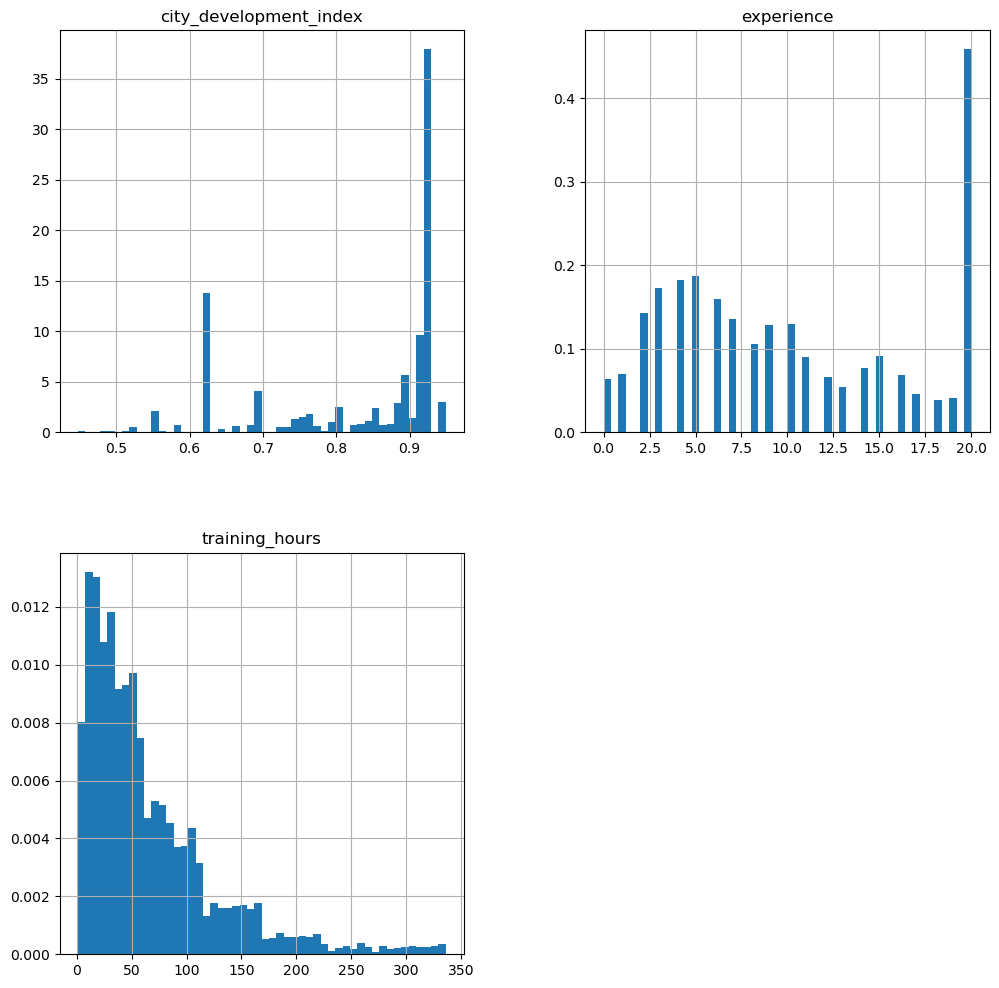

In [46]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

In [67]:
def eda(org,new,var):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.distplot(org[var])
    sns.distplot(new[var])
    plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(org[var])
    plt.subplot(1,2,2)
    sns.boxplot(new[var])
    print('Before Imputation ',org[var].var())
    print('After Imputation ',new[var].var())
    print('% change in variance ',((org[var].var()-new[var].var())*100)/org[var].var())

C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Before Imputation  0.015211374664424446
After Imputation  0.014959237406623409
% change in variance  1.6575573435234763


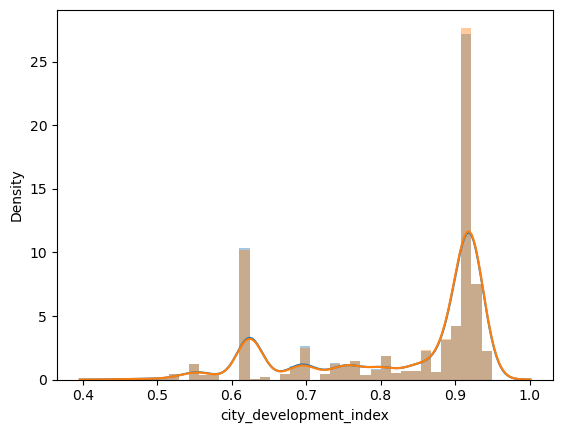

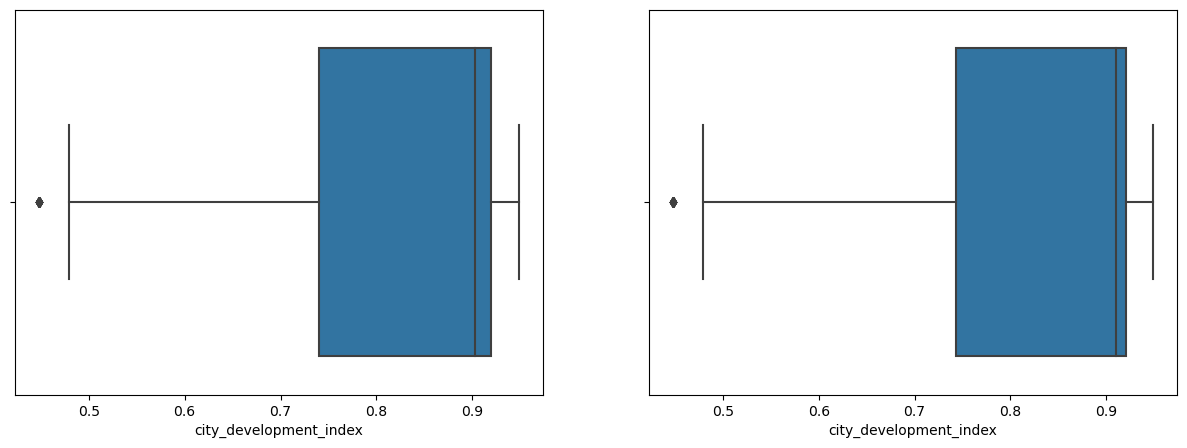

In [68]:
eda(df, new_df, 'city_development_index')

C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before Imputation  42.31851676548554
After Imputation  42.240657490952955
% change in variance  0.18398394008952199


C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


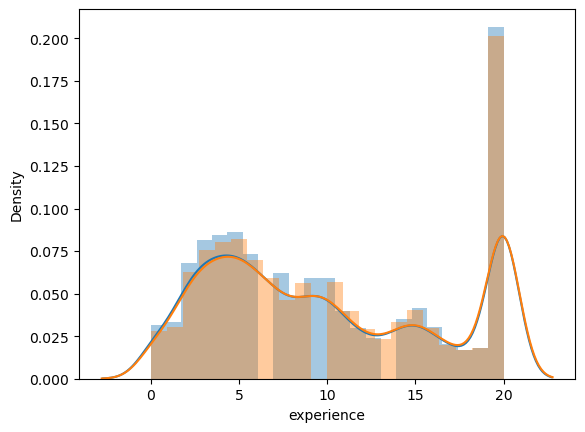

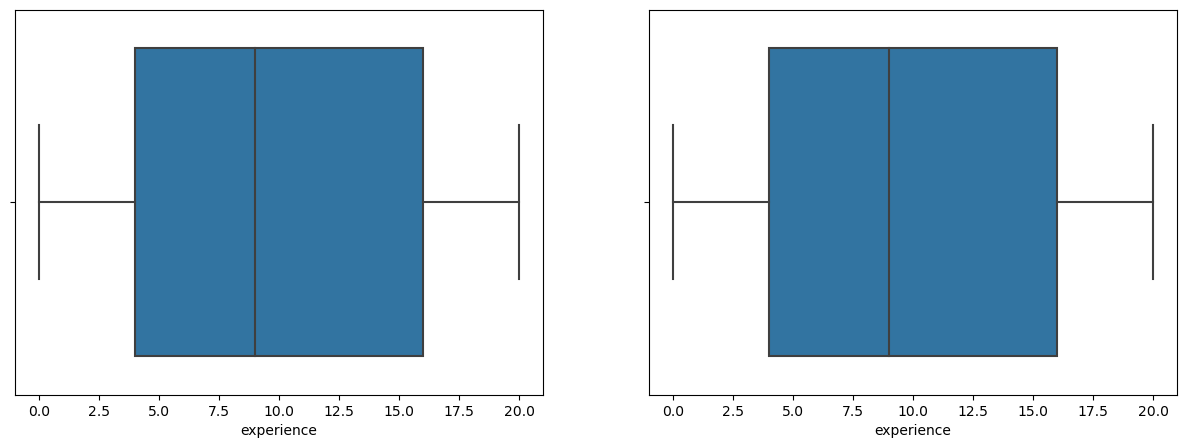

In [69]:
eda(df, new_df, 'experience')

C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

Before Imputation  3586.2881933989347
After Imputation  3576.1342391288217
% change in variance  0.2831326910314337


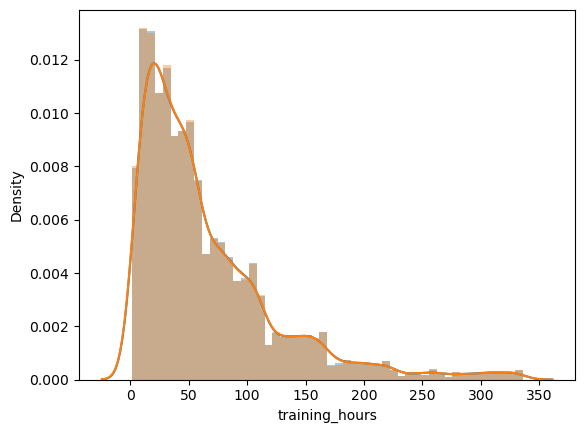

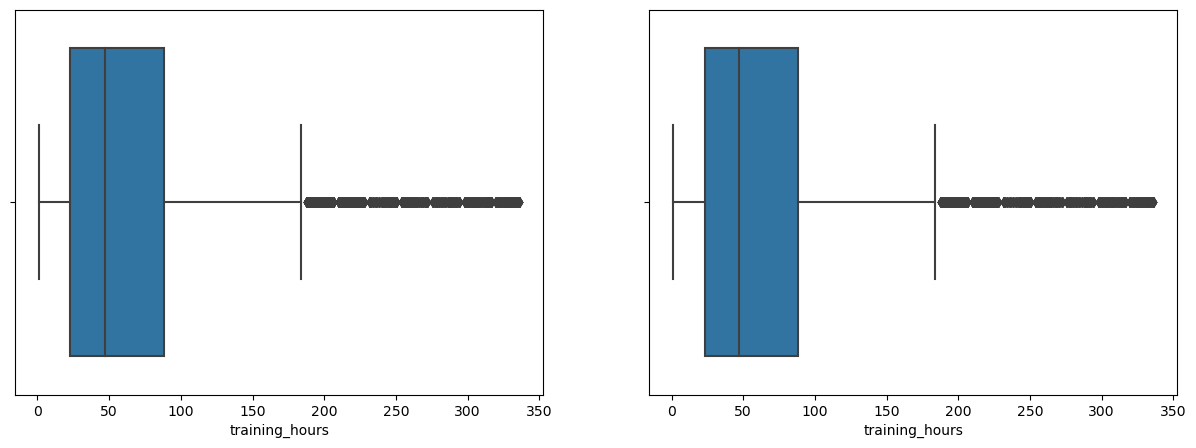

In [70]:
eda(df, new_df, 'training_hours')

## plotting

<AxesSubplot:>

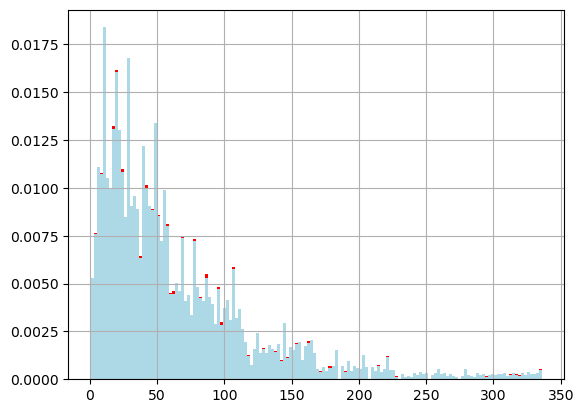

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=150,ax=ax,density=True, color='red')

new_df['training_hours'].hist(bins=150,ax=ax,density=True, color='lightblue')

<AxesSubplot:ylabel='Density'>

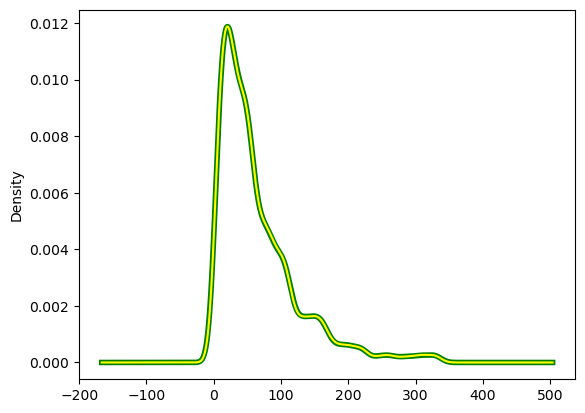

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
new_df['training_hours'].plot.density(color='green',linewidth=4)
df['training_hours'].plot.density(color='yellow')



<AxesSubplot:>

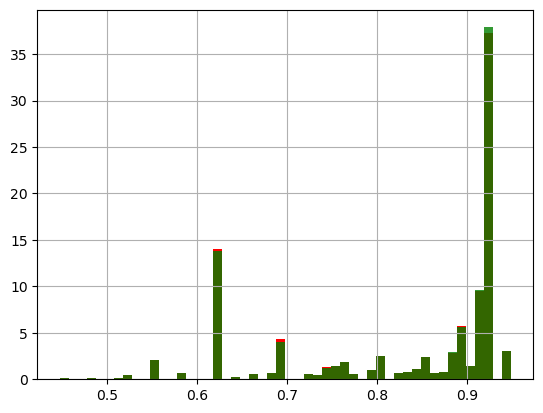

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

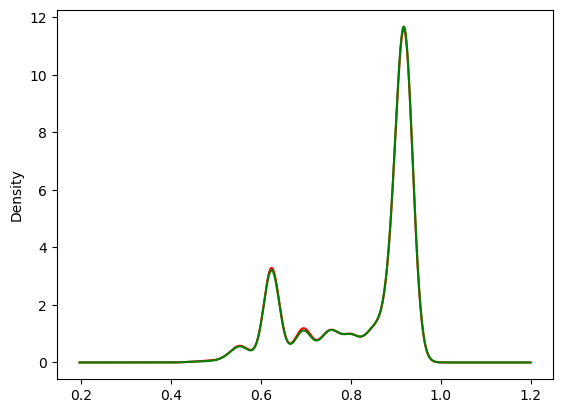

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

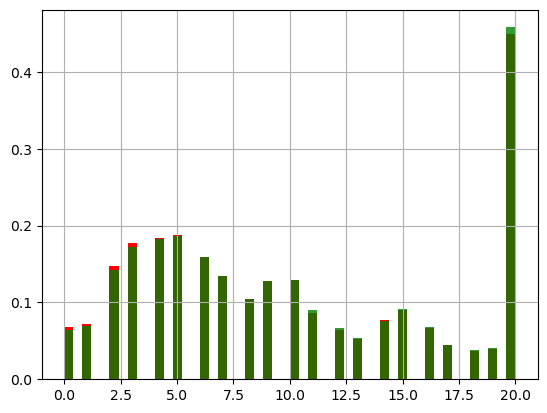

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

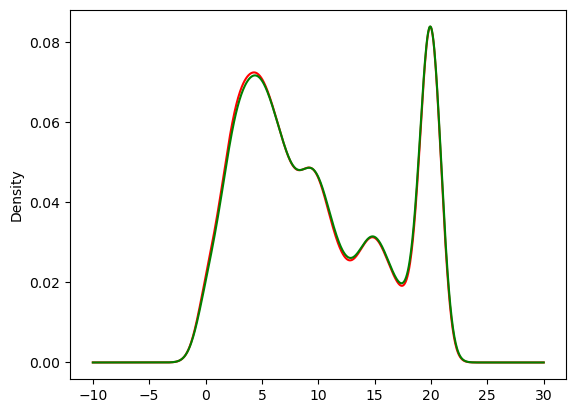

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [102]:
df['enrolled_university'].value_counts()/len(df)

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: enrolled_university, dtype: float64

In [104]:
new_df['enrolled_university'].value_counts()/len(new_df)

no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: enrolled_university, dtype: float64

In [108]:
temp = pd.concat([df['enrolled_university'].value_counts()/len(df),
          new_df['enrolled_university'].value_counts()/len(new_df)],axis=1)

temp.columns = ['Original','CCA']

In [110]:
temp

,Original,CCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([df['enrolled_university'].value_counts()/len(df),
          new_df['enrolled_university'].value_counts()/len(new_df)],axis=1)

temp.columns = ['Original','CCA']

In [136]:
def cat_cca(original, cca, columns=[]):
    ans = []
    for var in columns:
        temp = pd.concat([original[var].value_counts()/len(original),
              cca[var].value_counts()/len(cca)],axis=1)

        temp.columns = ['Original','CCA']
        ans.append(temp)
    return ans

In [142]:
cat_cca(df, new_df, ['enrolled_university','education_level'])

[                  Original       CCA
 no_enrollment     0.721213  0.735188
 Full time course  0.196106  0.200733
 Part time course  0.062533  0.064079,
                 Original       CCA
 Graduate        0.605387  0.619835
 Masters         0.227633  0.234082
 High School     0.105282  0.107380
 Phd             0.021610  0.022116
 Primary School  0.016077  0.016587]